<a href="https://colab.research.google.com/github/SriDharshana/signature_verification/blob/main/_signature_verification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os
import shutil
import random
import pandas as pd
import operator
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
if os.path.isdir("/content/drive/MyDrive/signature_dataset/training_sign") or os.path.isdir("/content/drive/MyDrive/signature_dataset/testing_sign"):
    print("Directory exist")
else:
    os.mkdir("/content/drive/MyDrive/signature_dataset/training_sign")
    os.mkdir("/content/drive/MyDrive/signature_dataset/testing_sign")
    os.mkdir("/content/drive/MyDrive/signature_dataset/training_sign/Fake")
    os.mkdir("/content/drive/MyDrive/signature_dataset/training_sign/Real")
    os.mkdir("/content/drive/MyDrive/signature_dataset/testing_sign/Fake")
    os.mkdir("/content/drive/MyDrive/signature_dataset/testing_sign/Real")

Directory exist


In [3]:
def dirHandler(path, name):
    for i in os.listdir(path):
        for j in os.listdir(path+i):
          #python package for revising function signatures at runtime
            if "forg" in i:
              # used to copy the content of the source file to the destination file
                shutil.copyfile(path+i+"/"+j, f"{name}/Fake/{j}")
            else:
                shutil.copyfile(path+i+"/"+j, f"{name}/Real/{j}")

In [140]:
train_dir = "/content/drive/MyDrive/signature_dataset/training_sign"
val_dir = "/content/drive/MyDrive/signature_dataset/testing_sign"
CATEGORIES = ["Fake","Real"]

In [141]:
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(CATEGORIES[y[i]])
        plt.axis("off")
    plt.show()

In [142]:
def split_train_test(data, img, labels):
    for i in data:
        img.append(i[0])
        labels.append(i[1])

In [143]:
def get_data(directory, list_dir):
    IMG_SIZE= 100
    for category in CATEGORIES:
        path = os.path.join(directory, category)
        class_num = CATEGORIES.index(category)
        for i, img in enumerate(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img))
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
            list_dir.append([new_array, class_num])

In [144]:

train_data = []
val_data = []
 
get_data(train_dir,train_data)
get_data(val_dir,val_data)

In [145]:
len(train_data), len(val_data)

(230, 92)

In [146]:
random.shuffle(train_data)
random.shuffle(val_data)

In [147]:
X_train = []
y_train = []
X_val = []
y_val = []

split_train_test(train_data, X_train,y_train)
split_train_test(val_data, X_val,y_val)

In [148]:
len(X_train), len(X_val), len(y_train), len(y_val)


(230, 92, 230, 92)

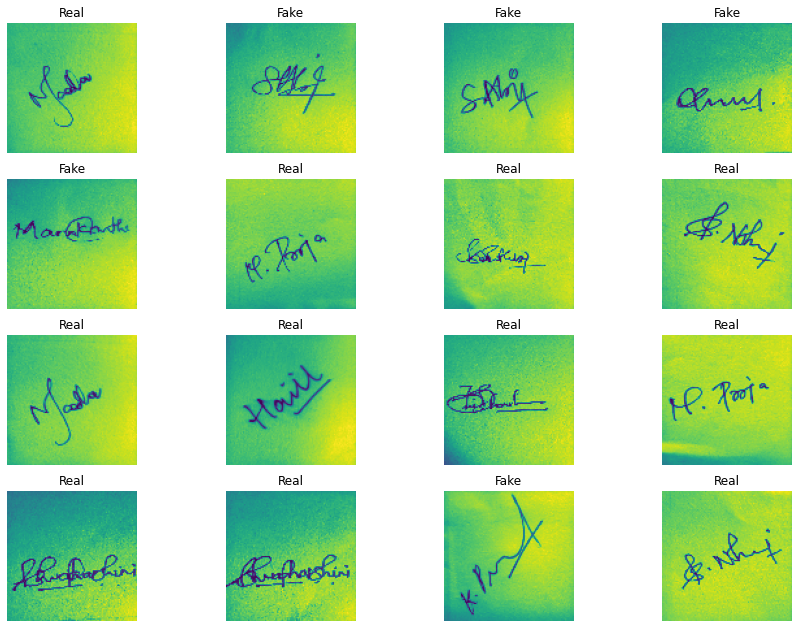

In [149]:
plotImages(X_train,y_train)


In [164]:
def bar_chart_plotting(path_data):
  # creates a new empty hash
    hash = {}
    for file in os.listdir(path_data):
        m = 0
        for x in os.listdir(path_data + "/" + file):
            m += 1
        hash[file] = m
    print(hash)
    a=list(range(len(hash)))
    b=list(hash.values())
    plt.bar(a,b,tick_label=list(hash.keys()),color ='yellow',width = 0.6)
    plt.xlabel("Classes")
    plt.ylabel("No. of Fake and Real")
    plt.title("Count of Fake and Real Images")
    plt.show()

{'Real': 115, 'Fake': 115}


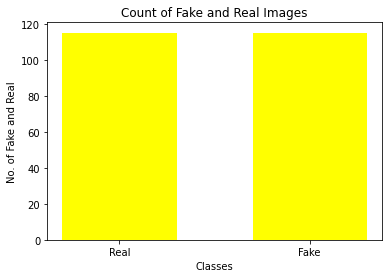

In [165]:
bar_chart_plotting("/content/drive/MyDrive/signature_dataset/training_sign")


{'Fake': 46, 'Real': 46}


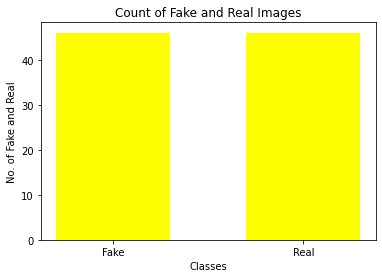

In [166]:
bar_chart_plotting("/content/drive/MyDrive/signature_dataset/testing_sign")


In [167]:
def preprocess(image):
    img = image.reshape(10000)
    return img

In [526]:
def training(training_x, training_y):
    forest = RandomForestClassifier(n_estimators=50)
    forest.fit(training_x, training_y)
    return forest

In [527]:
def predicting(testing_X, forest):
    predictions = forest.predict(testing_X)    
    return predictions

In [528]:
xtrain = list(map(preprocess, X_train))
xval = list(map(preprocess, X_val))

In [529]:
forest = training(xtrain, y_train)
predictions = predicting(xval, forest)


In [538]:
print("Accuracy Score : ",accuracy_score(predictions, y_val))

Accuracy Score : 0.866544087


In [539]:
img_array = cv2.imread("/content/drive/MyDrive/signature_dataset/sample_test/IMG20221103154752.jpg")
new_array = cv2.resize(img_array, (100, 100))
new_array = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY).reshape(10000)

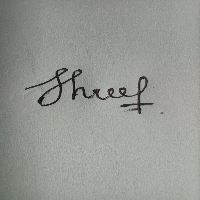

In [540]:
from google.colab.patches import cv2_imshow
height = 200
width = 200
dimensions = (width, height)
new_image = cv2.resize(img_array, dimensions, interpolation=cv2.INTER_LINEAR)
cv2_imshow(new_image)

 


In [541]:
prediction_image = predicting([new_array], forest)

In [542]:
print("Predicted Class is",CATEGORIES[forest.classes_[prediction_image[0]]])

Predicted Class is Real


In [544]:
import pickle

filename = 'signature_verification.pkl'
pickle.dump(forest, open(filename, 'wb'))